In [2]:
import polars as pl
import matplotlib.pyplot as plt

In [4]:
# Adjust the relative path to your CSV file if needed.
stock_csv_path = "../data/raw/stocks/csv/ohlcv_split_adjusted.csv"

# Read the CSV file without using the parse_dates argument.
stock_df = pl.read_csv(stock_csv_path)

stock_df = stock_df.with_columns([
    pl.col("date").str.strptime(pl.Date, format="%Y-%m-%d")
])

In [2]:
options_csv_path = "../data/raw/options/csv/option_chain.csv"

options_df = pl.read_csv(options_csv_path)

options_df = options_df.with_columns([
    pl.col("date").str.strptime(pl.Date, format="%Y-%m-%d")
])

In [4]:
# Filter for rows where act_symbol is 'AAPL' and sort by date.
aapl_stock_df = stock_df.filter(pl.col("act_symbol") == "AAPL").sort("date")

# Convert the 'date' and 'close' columns to lists for plotting.
stock_dates = aapl_stock_df["date"].to_list()
stock_close_prices = aapl_stock_df["close"].to_list()


In [18]:
options_df.filter(pl.col("act_symbol") == "AAPL").with_columns(
    pl.int_range(0, pl.len()).over(["date", "act_symbol"]).alias("row_num")
).filter(
    pl.col("row_num").is_in([10])
).drop("row_num")[150:160]

date,act_symbol,expiration,strike,call_put,bid,ask,vol,delta,gamma,theta,vega,rho
date,str,str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64
2020-08-28,"""AAPL""","""2020-09-11""",400.0,"""Call""",97.65,101.75,0.5724,0.979,0.0009,-0.1022,0.0493,0.1491
2020-08-31,"""AAPL""","""2020-09-11""",103.75,"""Call""",23.7,27.8,0.8242,0.9449,0.006,-0.0939,0.0249,0.029
2020-09-02,"""AAPL""","""2020-09-18""",105.0,"""Call""",26.2,27.65,0.6989,0.9459,0.0057,-0.0663,0.0302,0.0427
2020-09-04,"""AAPL""","""2020-09-18""",96.25,"""Call""",25.0,25.5,0.7979,0.9384,0.0064,-0.0824,0.0288,0.0338
2020-09-07,"""AAPL""","""2020-09-18""",96.25,"""Call""",25.0,25.5,0.7979,0.9384,0.0064,-0.0824,0.0288,0.0338
2020-09-09,"""AAPL""","""2020-09-25""",93.75,"""Call""",23.65,24.0,0.6291,0.9616,0.0054,-0.0406,0.0205,0.039
2020-09-11,"""AAPL""","""2020-09-25""",92.5,"""Call""",19.65,20.05,0.638,0.9446,0.008,-0.0562,0.0245,0.0329
2020-09-14,"""AAPL""","""2020-09-25""",95.0,"""Call""",20.35,20.65,0.6078,0.9709,0.0055,-0.037,0.0133,0.0275
2020-09-16,"""AAPL""","""2020-10-02""",92.5,"""Call""",19.85,20.15,0.6068,0.9429,0.008,-0.0513,0.0269,0.0375


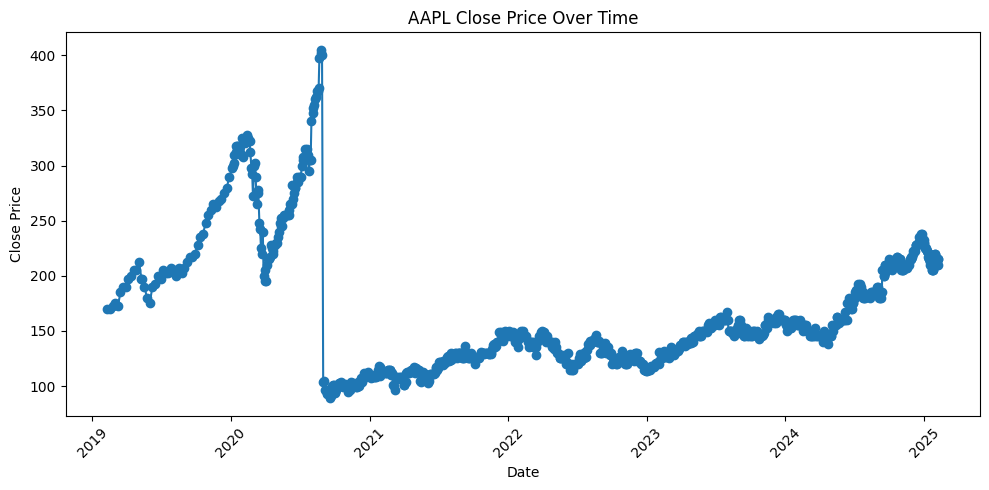

In [ ]:
aapl_options_df = options_df.filter(pl.col("act_symbol") == "AAPL").with_columns(
    pl.int_range(0, pl.len()).over(["date", "act_symbol"]).alias("row_num")
).filter(
    pl.col("row_num").is_in([10])
).drop("row_num")

aapl_options_df = aapl_options_df.filter(pl.col("act_symbol") == "AAPL").sort("date")

options_dates = aapl_options_df["date"].to_list()
options_close_prices = aapl_options_df["strike"].to_list()

# Create a line plot of AAPL close prices over time.
plt.figure(figsize=(10, 5))
plt.plot(options_dates, options_close_prices, marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("AAPL Close Price Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

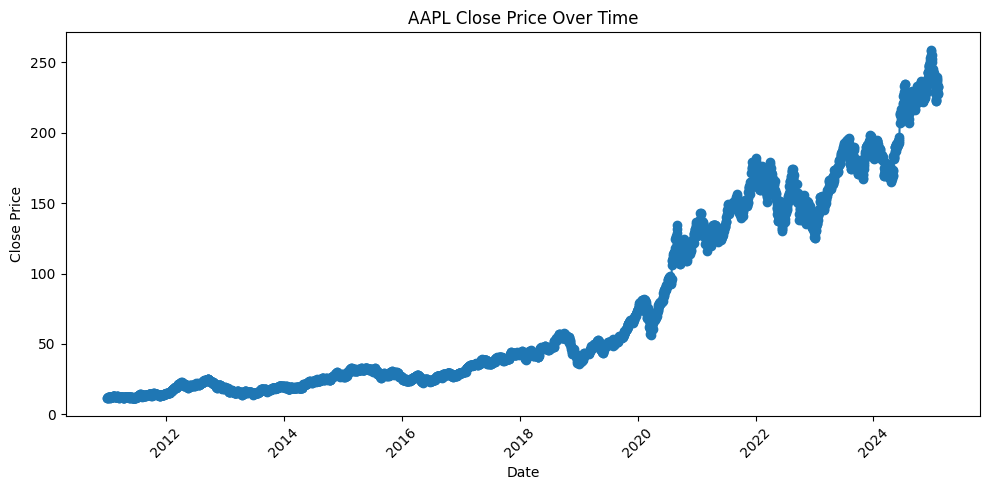

In [12]:
# Create a line plot of AAPL close prices over time.
plt.figure(figsize=(10, 5))
plt.plot(stock_dates, stock_close_prices, marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("AAPL Close Price Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [117]:
vol_df = pl.read_csv("../data/raw/options/csv/volatility_history.csv")

vol_df = vol_df.with_columns([
    pl.col("date").str.strptime(pl.Date, format="%Y-%m-%d")
])

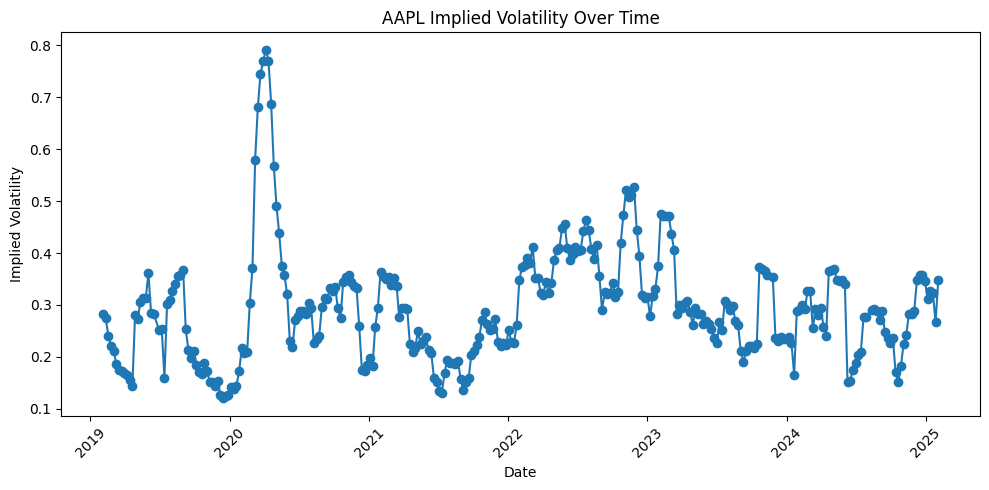

In [ ]:
aapl_vol_df = vol_df.filter(pl.col("act_symbol") == "GOOGL").sort("date")
# Compute the difference between consecutive dates
aapl_vol_df = aapl_vol_df.with_columns(
    (pl.col("date").diff().dt.total_days()).alias("days_between")
)

# Resample to ensure we always have one observation per week (Monday)
weekly_aapl_vol_df = (
    aapl_vol_df
    .group_by_dynamic("date", every="1w", closed="left", start_by="sunday") 
    .agg([
        pl.col("hv_current").last().alias("weekly_hv"), 
        pl.col("days_between").max().alias("max_gap")
    ])
)

# aapl_vol_df = aapl_vol_df.filter(pl.col("date") >= pl.date(2020, 1, 4))

# Filter data to rows where the 


# Display the first few rows
weekly_aapl_vol_df

# Plot weekly hv
plt.figure(figsize=(10, 5))
plt.plot(weekly_aapl_vol_df["date"].to_list(), weekly_aapl_vol_df["weekly_hv"].to_list(), marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Implied Volatility")
plt.title("AAPL Implied Volatility Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()







# plt.figure(figsize=(10, 5))
# plt.plot(weekly_aapl_vol_df["date"].to_list(), weekly_aapl_vol_df["max_gap"].to_list(), marker='o', linestyle='-')
# plt.xlabel("Date")
# plt.ylabel("Days since last observation")
# plt.title("AAPL Vol Time Gaps over Time")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# List observations with gaps of 7 or more days
# aapl_vol_df.filter(pl.col("days_between") >= 4).tail(10)

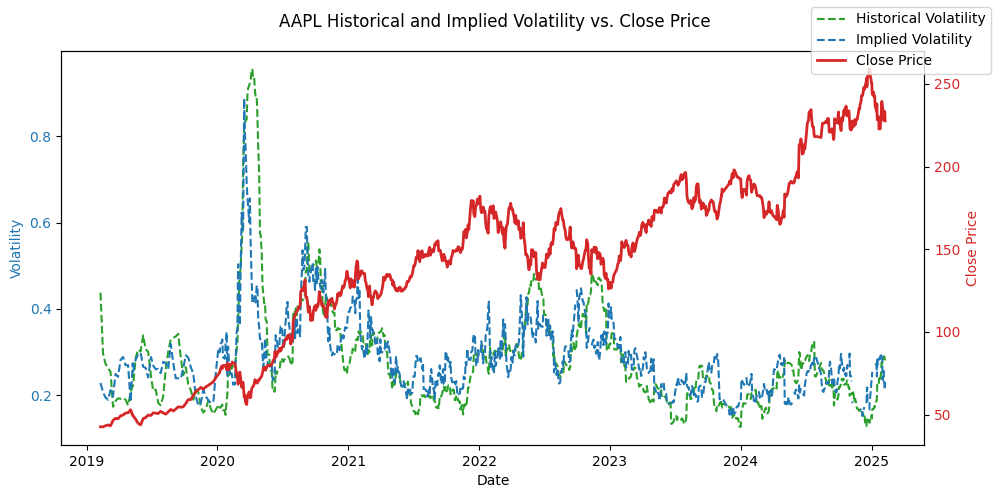

In [89]:
# Perform inner join
aapl_stock_vol_dts = aapl_vol_df.join_asof(
    aapl_stock_df, on="date", strategy="backward"
)
aapl_vol_stock_dts = aapl_vol_df.join(aapl_stock_vol_dts, on=["date", "act_symbol"], how="inner")

aapl_stock_df.filter(pl.col("date") > pl.date(2019, 2, 8), pl.col("date") < pl.date(2019, 2, 18))

aapl_stock_vol_dts

fig, ax1 = plt.subplots(figsize=(10, 5))

# Primary y-axis for volatility
ax1.set_xlabel("Date")
ax1.set_ylabel("Volatility", color="tab:blue")
ax1.plot(aapl_vol_stock_dts["date"].to_list(), aapl_vol_stock_dts["hv_current"].to_list(), 
         label="Historical Volatility", color="tab:green", linestyle="dashed")
ax1.plot(aapl_vol_stock_dts["date"].to_list(), aapl_vol_stock_dts["iv_current"].to_list(), 
         label="Implied Volatility", color="tab:blue", linestyle="dashed")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Create a second y-axis
ax2 = ax1.twinx()
ax2.set_ylabel("Close Price", color="tab:red")
ax2.plot(aapl_stock_vol_dts["date"].to_list(), aapl_stock_vol_dts["close"].to_list(), 
         label="Close Price", color="tab:red", linewidth=2)
ax2.tick_params(axis="y", labelcolor="tab:red")

fig.suptitle("AAPL Historical and Implied Volatility vs. Close Price")
fig.legend()
fig.tight_layout()

plt.show()

In [94]:
dividend_df = pl.read_csv("../data/raw/stocks/csv/dividend.csv")

# make ex_date date time
dividend_df = dividend_df.with_columns([
    pl.col("ex_date").str.strptime(pl.Date, format="%Y-%m-%d")
])


In [95]:
dividend_df.filter(pl.col("act_symbol") == "AAPL").sort("ex_date")

act_symbol,ex_date,amount
str,date,f64
"""AAPL""",1987-05-11,0.00214
"""AAPL""",1987-08-10,0.00214
"""AAPL""",1987-11-17,0.00286
"""AAPL""",1988-02-12,0.00286
"""AAPL""",1988-05-16,0.00286
…,…,…
"""AAPL""",2023-11-10,0.24
"""AAPL""",2024-02-09,0.24
"""AAPL""",2024-05-10,0.25


In [6]:
# Filter stock df to vix
vix_stock_df = stock_df.filter(pl.col("act_symbol") == "VIX").sort("date")
vix_stock_df

date,act_symbol,open,high,low,close,volume
date,str,f64,f64,f64,f64,i64


act_symbol,security_name,listing_exchange,market_category,is_etf,round_lot_size,is_test_issue,financial_status,cqs_symbol,nasdaq_symbol,is_next_shares,last_seen
str,str,str,str,i64,i64,i64,str,str,str,i64,str
